# 1. Setup Mario

In [1]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [1]:
# Import the game
import gym_super_mario_bros
# Import the Joypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [6]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(10000): 
    # Start the game to begin with 
    if done: 
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

C:\Users\hammad\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


# 2. Preprocess Environment

In [1]:
# Install pytorch
!pip install torch==1.10.1 torchvision==0.11.2 torchaudio===0.10.1 

     ---------------------------------------- 0.0/226.5 MB ? eta -:--:--
     -------------------------------------- 0.0/226.5 MB 660.6 kB/s eta 0:05:43
     -------------------------------------- 0.0/226.5 MB 660.6 kB/s eta 0:05:43
     -------------------------------------- 0.0/226.5 MB 660.6 kB/s eta 0:05:43
     -------------------------------------- 0.0/226.5 MB 279.3 kB/s eta 0:13:31
     -------------------------------------- 0.1/226.5 MB 328.2 kB/s eta 0:11:30
     -------------------------------------- 0.1/226.5 MB 302.7 kB/s eta 0:12:29
     -------------------------------------- 0.1/226.5 MB 327.7 kB/s eta 0:11:32
     -------------------------------------- 0.1/226.5 MB 344.8 kB/s eta 0:10:57
     -------------------------------------- 0.1/226.5 MB 343.4 kB/s eta 0:11:00
     -------------------------------------- 0.1/226.5 MB 355.0 kB/s eta 0:10:38
     -------------------------------------- 0.2/226.5 MB 353.1 kB/s eta 0:10:42
     -------------------------------------- 0.2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
stable-baselines3 1.8.0 requires torch>=1.11, but you have torch 1.10.1 which is incompatible.


     ----- ------------------------------- 31.7/226.5 MB 965.6 kB/s eta 0:03:22
     ----- ------------------------------- 31.7/226.5 MB 969.9 kB/s eta 0:03:21
     ----- ------------------------------- 31.7/226.5 MB 980.1 kB/s eta 0:03:19
     ----- ------------------------------- 31.7/226.5 MB 980.1 kB/s eta 0:03:19
     ----- ------------------------------- 31.7/226.5 MB 974.3 kB/s eta 0:03:20
     ----- ------------------------------- 31.7/226.5 MB 974.3 kB/s eta 0:03:20
     ----- ------------------------------- 31.8/226.5 MB 986.0 kB/s eta 0:03:18
     ----- ------------------------------- 31.8/226.5 MB 989.0 kB/s eta 0:03:17
     ----- ------------------------------- 31.9/226.5 MB 999.6 kB/s eta 0:03:15
     ----- --------------------------------- 31.9/226.5 MB 1.0 MB/s eta 0:03:14
     ----- --------------------------------- 31.9/226.5 MB 1.0 MB/s eta 0:03:14
     ----- --------------------------------- 31.9/226.5 MB 1.0 MB/s eta 0:03:13
     ----- -----------------------------

In [6]:
# Install stable baselines for RL stuff
!pip install stable-baselines3[extra]

In [3]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [4]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [29]:
state = env.reset()

In [31]:
state, reward, done, info = env.step([6])

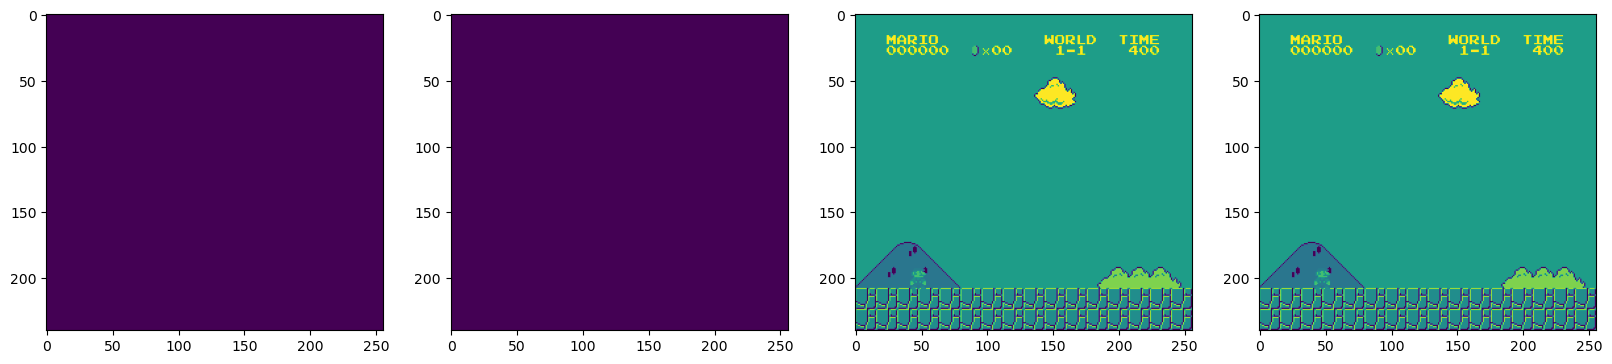

In [32]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

# 3. Train the RL Model

In [5]:
# Import os for file path management
import os 
# Import PPO for algos
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [6]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            print(self.n_calls)
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [7]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [8]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [60]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.00001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the AI model, this is where the AI model starts to learn

model.learn(total_timesteps=100000, callback=callback)

Logging to ./logs/PPO_9


C:\Users\hammad\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 51  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 10         |
|    iterations           | 2          |
|    time_elapsed         | 95         |
|    total_timesteps      | 1024       |
| train/                  |            |
|    approx_kl            | 0.00969019 |
|    clip_fraction        | 0.0125     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.94      |
|    explained_variance   | -0.00282   |
|    learning_rate        | 1e-05      |
|    loss                 | 62.2       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.0113    |
|    value_loss           | 173        |
----------------------------------------
-----------------------------------------
| time/          

-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 13          |
|    time_elapsed         | 993         |
|    total_timesteps      | 6656        |
| train/                  |             |
|    approx_kl            | 0.006152627 |
|    clip_fraction        | 0.0391      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.0257      |
|    learning_rate        | 1e-05       |
|    loss                 | 0.0685      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00834    |
|    value_loss           | 0.211       |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 6           |
|    iterations           | 14          |
|    time_elapsed         | 1078        |
|    total_timesteps      | 7168  

------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 24           |
|    time_elapsed         | 1969         |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0042341147 |
|    clip_fraction        | 0.0207       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.17        |
|    explained_variance   | -0.0151      |
|    learning_rate        | 1e-05        |
|    loss                 | 0.149        |
|    n_updates            | 230          |
|    policy_gradient_loss | -0.0028      |
|    value_loss           | 0.449        |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 6            |
|    iterations           | 25           |
|    time_elapsed         | 2059         |
|    total_

In [19]:
model.save('thisisatestmodel')

# 4. Test it Out

In [9]:
# Load model
model = PPO.load('./train/best_model_30000')

In [ ]:
state = env.reset()

In [10]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\hammad\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 